In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


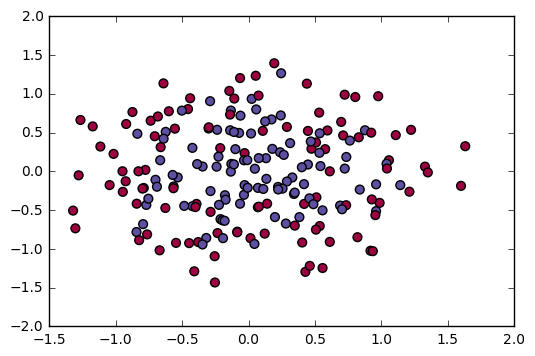

In [4]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_circles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [7]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
clf.fit(X.T,Y.T)

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [12]:
lr_predict = clf.predict(X.T)

Y.size

200

In [17]:
precent = (float(np.dot(Y,lr_predict) + np.dot(1-Y,1-lr_predict))/ float(Y.size))*100
print('Accuracy of logistic regression: {} % percentage of correctly labelled datapoints'.format(precent))

Accuracy of logistic regression: 49.5 % percentage of correctly labelled datapoints


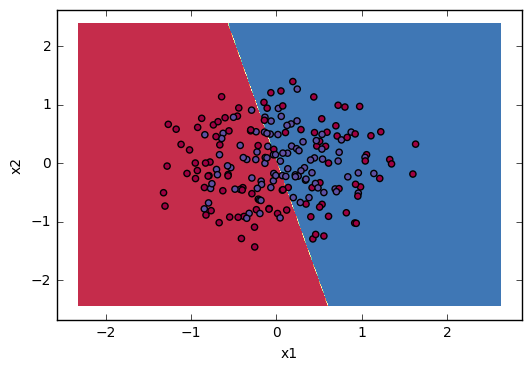

In [19]:
#plot the decision boundary
plot_decision_boundary(lambda x:clf.predict(x),X,Y)

In [38]:
def initialize_parameters_noisy_circles(n_x,n_h,n_y):
     return {
        "W1":np.random.randn(n_h,n_x)*0.01,
        "b1":np.zeros((n_h,1)),
        "W2":np.random.rand(n_y,n_h)*0.01,
        "b2":np.zeros((n_y,1))
        }

In [50]:
#return activation
def forward_propagation_noisy_circles(X, feature_weights):
    W1 = feature_weights["W1"]
    b1 = feature_weights["b1"]
    W2 = feature_weights["W2"]
    b2 = feature_weights["b2"]
    
    Z1 = np.dot(W1,X)+b1 # W1:n_h*n_x , X:n_x*m, therefore Z1 will be n_h*m
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    activations ={
    "Z1":Z1,  # W1:n_h*n_x , X:n_x*m, therefore Z1 will be n_h*m
    "A1":A1,
    "Z2":Z2,
    "A2":A2
        }
    
    return A2,activations
    
    

In [40]:
def compute_cost_noisy_circles(A2, Y, feature_weights):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y)
    logprobs = logprobs + np.multiply(np.log(1-A2),1-Y)
    cost = -1*np.sum(logprobs) / m 
    
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    
    return cost
        

In [41]:
def backward_propagation_noisy_circles(feature_weights, activations, X, Y):
    m = X.shape[1]
    W1 = feature_weights["W1"]
    W2 = feature_weights["W2"]
    
    A1 = activations['A1']
    A2 = activations['A2']
    
    dZ2 = A2-Y #size dz2: 1*m
    dW2 = np.dot(dZ2,A1.T)/m  #dw2: 1*4
    db2 = np.sum(dZ2,axis=1,keepdims = True)/m #size 1*1
    dZ1 = np.multiply(np.dot(W2.T,dZ2), 1 - np.power(A1, 2))  #size 4*m, 
    dW1 = np.dot(dZ1,X.T)/m #size:4*n
    db1 = np.sum(dZ1,axis=1,keepdims = True)/m #size 4*1
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [42]:
def update_parameters_noisy_circles(feature_weights, grads, learning_rate = 1.2):
    W1 = feature_weights['W1']
    b1 = feature_weights['b1']
    W2 = feature_weights['W2']
    b2 = feature_weights['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    update_feature_weights = {"W1": W1 - learning_rate*dW1,
                  "b1": b1 - learning_rate*db1,
                  "W2": W2 - learning_rate*dW2,
                  "b2": b2 - learning_rate*db2}
    
    return update_feature_weights
    
    

In [86]:
def nn_model_noisy_circles(X, Y, n_h, num_iterations = 10000, print_cost=False,hidden_units=5):
    np.random.seed(3)
    feature_weights = initialize_parameters_noisy_circles(X.shape[0],hidden_units,Y.shape[0])
    W1 = feature_weights['W1']
    b1 = feature_weights['b1']
    W2 = feature_weights['W2']
    b2 = feature_weights['b2']
    
    for i in range(0, num_iterations):
        A2, activations = forward_propagation_noisy_circles(X, feature_weights)
        cost = compute_cost_noisy_circles(A2, Y, feature_weights)
        grads = backward_propagation_noisy_circles(feature_weights, activations, X, Y)
        
        feature_weights = update_parameters_noisy_circles(feature_weights, grads,1.8)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
    return feature_weights
    

In [87]:
def predict_noisy_circles(parameters, X):
   
    A2, activations = forward_propagation_noisy_circles(X, parameters)  #A2 size will be n_y*n
    predictions = A2>0.5
  
    return predictions

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.543871
Cost after iteration 2000: 0.479005
Cost after iteration 3000: 0.472225
Cost after iteration 4000: 0.471299
Cost after iteration 5000: 0.470398
Cost after iteration 6000: 0.467382
Cost after iteration 7000: 0.467163
Cost after iteration 8000: 0.467149
Cost after iteration 9000: 0.467276


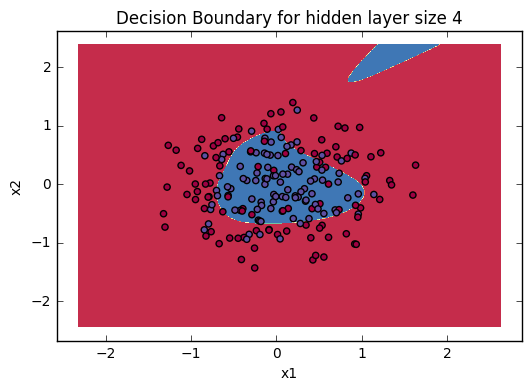

In [88]:
# Build a model with a n_h-dimensional hidden layer
feature_weights = nn_model_noisy_circles(X, Y, n_h = 100, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict_noisy_circles(feature_weights, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [89]:
# Print accuracy
predictions = predict_noisy_circles(feature_weights, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 77%
